# Progetto PAA
Autore: Filippo Mameli - 6222254 - filippo.mameli@stud.unifi.it

### Setup del progetto

In [1]:
from sympy import *
from sympy import Sum, factorial, oo
from sympy.abc import i, j, k, m, n, x, t
import sys
init_printing()

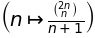

In [2]:
C = Function('C')
n = symbols('n', integer=True)
catalan_expr = 1 / (n + 1) * binomial(2 * n, n)
CN = Lambda([n], catalan_expr)
CN

I primi 10 numeri di catalan sono:

In [3]:
[(CN(i).doit()) for i in range(0, 11)]

### Coefficienti binomiali centrali
Sappiamo che la funzione generatrice dei coefficienti binomiali centrali è data da:
$$\sum_{n=0}^{\infty}\binom{2n}{n}x^n = \frac{1}{\sqrt{1-4x}}$$
Si può controllare infatti per i primi dieci elementi che questa relazione è vera

In [4]:
centralN = Lambda([n], binomial(2 * n, n))
centralN

In [5]:
[(centralN(i).doit()) for i in range(0, 11)]

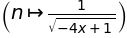

In [6]:
x = symbols('x', integer=True)
centralBinomialCoef_expr = Lambda([n],1 / (sqrt(1 - 4 * x)))
centralBinomialCoef_expr

In [7]:
series(centralBinomialCoef_expr(x), x, n=11)

### Numeri di Catalan
Per i numeri di Catalan invece vale questa relazione:
$$\sum_{n=0}^{\infty}C_nx^n =\sum_{n=0}^{\infty}\frac{1}{n + 1}\binom{2n}{n}x^n = \frac{1-\sqrt{1-4x}}{2x}$$
Infatti:

In [8]:
catalan_expr = Lambda([n],(1 - sqrt(1 - 4 * x)) / (2*x))
catalan_expr
series(catalan_expr(x), x, n=11)

Dalla funzione generatrice dei coefficienti binomiali, i numeri di Catalan e i numeri amonici
sono state ricavate alcune interessanti serie come
$\sum_{n=1}^{\infty}\frac{1}{n^3}H_n = \frac{\pi^4}{72}$ e $\sum_{n=1}^{\infty}\frac{1}{n^2}H_n^2 = \frac{17\pi^4}{360}$

Per ragioni di calcolo si utilizza la seconda formula sviluppata nell'articolo cioe':
$\frac{5}{4}\sum_{n=1}^{\infty}\frac{1}{n^4} = \frac{\pi^4}{72}$

In [9]:
h1 = Lambda([n], Sum(harmonic(n)*1/n**3, (n, 1, 100)))
h1_simple = Lambda([n], zeta(4) * 5/4)
(h1_simple(n).doit()) == (pi**4/72).doit()
# h1(n).evalf() - (pi**4/72).doit()

True

In [10]:
h2 = Lambda([n], Sum(harmonic(n)**2*1/n**2, (n, 1, oo)))
h2_simple = Lambda([n], zeta(4) * 17/4)
(h2_simple(n).doit()) == (17*pi**4/360).doit()

True

#### Formula 4
$$\sum_{k=0}^{n}\binom{n}{k}^2H_k = \binom{2n}{n}(2H_n - H_{2n})$$

In [11]:
h3 = Lambda([n], Sum(harmonic(k) * binomial(n,k)**2, (k, 1, n)))
h3_expr = Lambda([n], binomial(2*n, n)*(2*harmonic(n) - harmonic(2*n)))
[(h3(i).doit() == h3_expr(i).doit()) for i in range(0, 10)]

[True, True, True, True, True, True, True, True, True, True]

#### Formula 5
$$\sum_{n=0}^{\infty}\frac{1}{8^n}\binom{n}{k}H_n = 2\sqrt2 \ ln \ (\frac{1 +\sqrt2}{2})$$

In [12]:
h4 = Lambda([n], Sum(harmonic(n) * binomial(2*n, n) * 1/ 8**n, (n, 0, oo)))
h4_expr = 2 * sqrt(2) * ln((1 + sqrt(2)) / 2)
h4(n).evalf() == h4_expr.evalf()

True

#### Formula 6
$$ h_n = 1 + \frac{1}{3} + \frac{1}{5} + \dots + + \frac{1}{2n - 1}  $$

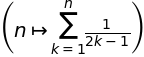

In [13]:
h_n = Lambda([n], Sum(1/ (2*k - 1), (k, 1, n)))
h_n

#### Formula 7
$\sum_{n=1}^{\infty} 8^{- n} {\binom{2 n}{n}} \operatorname{F}{\left (n \right )}h_n = \frac{\sqrt{10}}{10} \log{\left (2 \right )} + \frac{\sqrt{2}}{2} \log{\left (\frac{\sqrt{5}}{2} + \frac{3}{2} \right )}$

In [14]:
h5 = Lambda([n], Sum(h_n(n) * binomial(2*n, n) * 1/ 8**n * fibonacci(n), (n, 1, 107)))
h5_expr = 1/sqrt(10) * ln(2) + 1/sqrt(2) * ln((3 + sqrt(5))/ 2)
h5(n).evalf().round(10) == h5_expr.evalf().round(10)

True

#### Formula 8

\begin{equation}
\sum_{n=1}^\infty\,\binom{2n}{n}(H_{2n-1} - H_n)\frac{x^n}{n} = \ln^2(C(x)).
\end{equation}

In [15]:
h6 = Lambda([n], binomial(2*n, n) * (harmonic(2 * n - 1)- harmonic(n))/n)
[(h6(i).doit()) for i in range(1, 10)]

In [16]:
h6_expr = Lambda([n],(ln(catalan_expr(x)))**2)
series(h6_expr(x), x, n=10)

# The main theorems
$$H_n = \sum_{k=1}^n\,\frac{1}{k} = \int_0^1\,\left(\sum_{k=0}^{n-1}\,t^k\right)\,dt = \int_0^1\,\frac{1- t^n}{1-t}\,dt,$$

In [17]:
harmonic(n)
h7 = Lambda([n], Integral(Sum(x**k, (k, 0, n - 1)),(x, 0, 1)))
h7_2 = Lambda([n], Integral((1 - t**n)/(1 - t),(t, 0, 1)))
[(h7(i).doit(), h7(i).doit() == harmonic(i) == h7_2(i).doit()) for i in range(0, 11)]

[(0, True),
 (1, True),
 (3/2, True),
 (11/6, True),
 (25/12, True),
 (137/60, True),
 (49/20, True),
 (363/140, True),
 (761/280, True),
 (7129/2520, True),
 (7381/2520, True)]

\begin{eqnarray*}
\sum_{n=1}^\infty\,\binom{2n}{n}H_n\,x^n & = & \sum_{n=1}^\infty\,\binom{2n}{n}x^n\int_0^1\,\frac{1- t^n}{1-t}\,dt\\
& = & \int_0^1\,\frac{1}{1-t}\,\left(\sum_{n=1}^\infty\,\binom{2n}{n}\,(x^n - (xt)^n)\right)\,dt\\
& = & \int_0^1\,\frac{1}{1-t}\left(\frac{1}{\sqrt{1-4x}} - \frac{1}{\sqrt{1 -4xt}}\right)\,dt.
\end{eqnarray*}

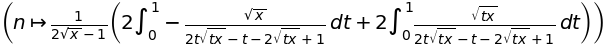

In [139]:
h9 = Lambda([n], binomial(2*n, n)* harmonic(n))
# h9_2 = Lambda([n], binomial(2*n, n)* Integral((1 - t**n)/(1 - t),(t, 0, 1)))
# h9_3 = Lambda([n], Integral(1/(1 - t) * Sum(binomial(2*n, n), (n, 1, oo)), (t, 0, 1)))
h9_4 = Lambda([n], integrate(1/(1 - t) * (1/(1 - sqrt(4*x)) - 1/(1 - sqrt(4*x*t))), (t, 0, 1)))
h9_4.simplify()

### Teorema 1
Sia $H_n$ l'ennesimo numero armonico. Allora
\begin{equation} 
\sum_{n=1}^\infty\,\binom{2n}{n}H_n\,x^n = \frac{2}{\sqrt{1-4x}}\,\ln\left(\frac{1+\sqrt{1 -4x}}{2\sqrt{1-4x}}\right). 
\end{equation}

In [32]:
h9 = Lambda([n], binomial(2*n, n)* harmonic(n))
h_expr = Lambda([x], Integral(1/(1-t)*(1/sqrt(1-4*x)-1/sqrt(1-4*x*t)),(t, 0, 1)))
[(h9(i).doit()) for i in range(1, 9)]

In [33]:
h9_expr = Lambda([n], 2/sqrt(1 - 4*x) * ln((1 + sqrt(1 - 4*x))/ (2*sqrt(1 - 4*x))))
series(h9_expr(x), x, n=9)

### Corollario 2
Let $C_n$ be the $n$th Catalan number. Then
\begin{equation}  
\sum_{n=1}^\infty\,C_nH_n\,x^{n+1} =  \ln 2 + \sqrt{1-4x}\ln(2\sqrt{1-4x}) - (1 + \sqrt{1 -4x})\ln(1+\sqrt{1 -4x})). 
\end{equation}


In [34]:
h10 = Lambda([n], catalan(n) * harmonic(n))
[(h10(i).doit()) for i in range(1, 8)]

In [35]:
h10_expr = Lambda([n], ln(2) + sqrt(1-4*x)*ln(2*sqrt(1-4*x))-(1 + sqrt(1 -4*x))*ln(1+sqrt(1 -4*x)))
series(h10_expr(x), x, n=9)

### Formula 11
\begin{equation}
\frac{1}{(1-x)^{m+1}}\,\ln\frac{1}{1-x} = \sum_{n=0}^\infty\,\binom{m+n}{n}(H_{m+n} - H_m)x^n.
\end{equation}  
Let $m = n$. Matching the coefficients of $x^n$ yields
\begin{equation}
\binom{2n}{n}(H_{2n} - H_n) = \sum_{k=1}^n\,\frac{1}{k}\binom{2n-k}{n}.
\end{equation}

In [71]:
h11_expr = Lambda([n, m], 1/(1 - x)**(m + 1)*ln(1/(1 - x)))
h11 = Lambda([n, m], binomial(m+n, n)* (harmonic(m + n) - harmonic(m)))
[(h11(3, 5).doit())]

In [72]:
series(h11_expr(3, 5), x , n=4)

In [81]:
h12 = Lambda([n], binomial(2*n, n)* (harmonic(2*n) - harmonic(n)))
h12_2 = Lambda([n], Sum(1/(k)*binomial(2*n - k, n), (k, 1, n)))
[(h12(i).doit()) for i in range(1, 8)]         

In [83]:
[(h12_2(i).doit()) for i in range(1, 8)] 

### Teorema 3

In [153]:
h13 = Lambda([n], binomial(2*n, n)* (harmonic(2*n) - harmonic(n)))
h13_1 = Lambda([n], -1/sqrt(1-4*x)*ln((1+sqrt(1-4*x))/2))
h13_2 = Lambda([x], 1/sqrt(1-4*x)*ln(CN(x)))
[(h13(i).doit()) for i in range(1, 8)] 

In [143]:
series(h13_1(x), x, n = 8)

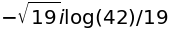